# Notes: Tiles and murals

In [1]:
import numpy as np
import re
import pandas as pd
import matplotlib.pyplot as plt
import scipy
from scipy import stats
from matplotlib.patches import Polygon
import math
from copy import copy

## Basic definitions

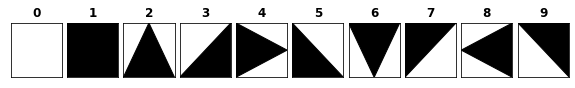

In [2]:
def get_0():
    return Polygon([(0,0)], color="k")

def get_1():
    return Polygon([(0,0), (0,1), (1,1), (1,0)], color="k")

def get_2():
    return Polygon([(0,0), (0.5,1), (1,0)], color="k")

def get_3():
    return Polygon([(0,0), (1,1), (1,0)], color="k")

def get_4():
    return Polygon([(0,0),(1,0.5), (0,1)], color="k")

def get_5():
    return Polygon([(0,0), (0,1), (1,0)], color="k")

def get_6():
    return Polygon([(0,1), (0.5,0), (1,1)], color="k")

def get_7():
    return Polygon([(0,0), (1,1), (0,1)], color="k")

def get_8():
    return Polygon([(0,0.5), (1,1),(1,0)], color="k")

def get_9():
    return Polygon([(1,0), (1,1), (0,1)], color="k")



def num2tile(num):
    if num==0:
        return get_0()
    elif num == 1:
        return get_1()
    elif num == 2:
        return get_2()
    elif num == 3:
        return get_3()
    elif num == 4:
        return get_4()
    elif num == 5:
        return get_5()
    elif num == 6:
        return get_6()
    elif num == 7:
        return get_7()
    elif num == 8:
        return get_8()
    elif num == 9:
        return get_9()
    
    
def float2vector(float_):
    float_str = "{:.10f}".format(float_)
    return [int(x) for x in "".join(re.findall('[0-9]+', float_str))]
    
v = [0,1,2,3,4,5,6,7,8,9]
fig, _ = plt.subplots(1,10, figsize=(10,1))
fig.subplots_adjust(hspace=0.01, wspace=0.10)
for n,ax in zip(v, fig.axes):
    ax.add_patch(num2tile(n))
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title('{}'.format(n), fontweight="bold")



## Rotation and convolution

In [3]:
rotate_cw = {0:0, 1:1,
             2:4, 3:5,
             4:6, 5:7,
             6:8, 7:9,
             8:2, 9:3}

rotate_ccw = {0:0, 1:1,
              2:8, 3:9,
              4:2, 5:3,
              6:4, 7:5,
              8:6, 9:7}



def convolution(input_v):
    v = copy(input_v)
    size = len(v)
    for i,_ in enumerate(v):
        if i > 0 and v[i] > 0:
            if v[i-1]%v[i] == 0:
                v[i-1] = rotate_cw[v[i-1]]
            else:
                v[i-1] = rotate_ccw[v[i-1]]
        if i < size-1 and v[i] > 0:
            if v[i+1]%v[i] == 0:
                v[i+1] = rotate_cw[v[i+1]]
            else:
                v[i+1] = rotate_ccw[v[i+1]]
    return v


In [4]:
10*np.pi

31.41592653589793

### Example

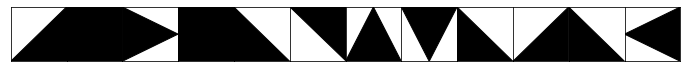

In [5]:
v = [3,1,4, 1, 5, 9, 2, 6, 5, 3, 5, 8]
fig, _ = plt.subplots(1,12, figsize=(12,1))
fig.subplots_adjust(hspace=0.00, wspace=0.00)
for n,ax in zip(v, fig.axes):
    ax.add_patch(num2tile(n))
    ax.set_xticks([])
    ax.set_yticks([])

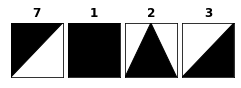

In [6]:
v = [7,1,2,3]
fig, _ = plt.subplots(1,4, figsize=(4,1))
fig.subplots_adjust(hspace=0.00, wspace=0.10)
for n,ax in zip(v, fig.axes):
    ax.add_patch(num2tile(n))
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title('{}'.format(n), fontweight="bold")


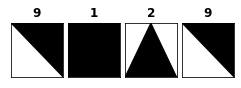

In [7]:
v = convolution(v)
fig, _ = plt.subplots(1,4, figsize=(4,1))
fig.subplots_adjust(hspace=0.00, wspace=0.10)
for n,ax in zip(v, fig.axes):
    ax.add_patch(num2tile(n))
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title('{}'.format(n), fontweight="bold")

## Convolution as a function between natural numbers

In [8]:
def int2list(n):
    return [int(i) for i in str(n)]
    

def list2int(v):
    v_str = [str(i) for i in v]
    return int("".join(v_str))

def conv(n):
    return list2int(convolution(int2list(n)))

def get_f(k):
    f = lambda x: conv(x) + k
    return f 

f_0 = get_f(0)
f_0_v = np.vectorize(f_0)

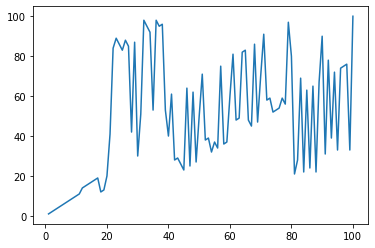

In [9]:
x = np.array(range(1, 100+1))
y = f_0_v(x)
plt.plot(x,y);

## Convolution as a function between real numbers

In [10]:
def c_float(float_):
    p_pos = str(np.abs(float_)).find(".")
    float_str = "{:.10f}".format(float_)
    v = [int(x) for x in "".join(re.findall('[0-9]+', float_str))]
    new_v = convolution(v)
    s = ""
    for i,n in enumerate(new_v):
        if i== p_pos:
            s+= "." + str(n)
        else:
            s += str(n)
    base_float = float(s)
    if float_ >=0:
        return base_float
    else:
        return -1*base_float
    
c_f = np.vectorize(c_float)

In [11]:
c_float(7.123), c_float(71.23)

(9.129, 91.29)

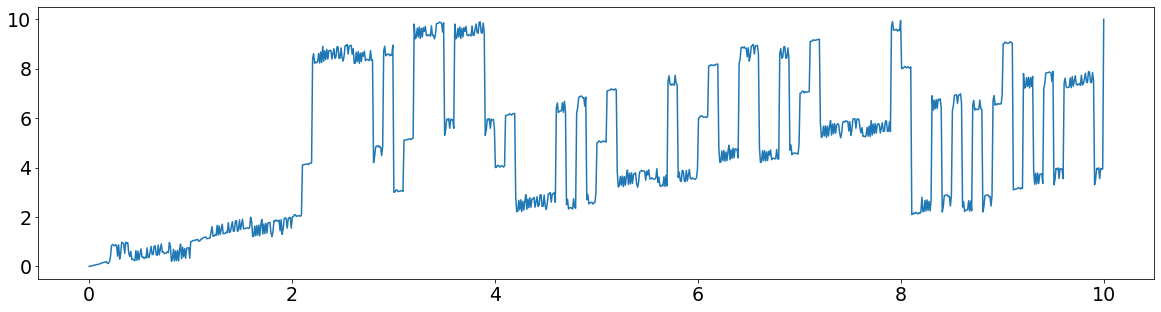

In [12]:
out_path ="img/0_10.png"
figsize=(20, 5)
fontsize_x=20.0
x_ticks_size=19
fontsize_y=20
y_ticks_size=19
linewidth=1

x = np.linspace(0,10,1000)
y = c_f(x)
fig, ax = plt.subplots(figsize=figsize)
plt.plot(x,y);
ax.tick_params(axis="x", labelsize=x_ticks_size);
ax.tick_params(axis="y", labelsize=y_ticks_size, rotation=0);
fig.savefig(out_path, bbox_inches="tight")

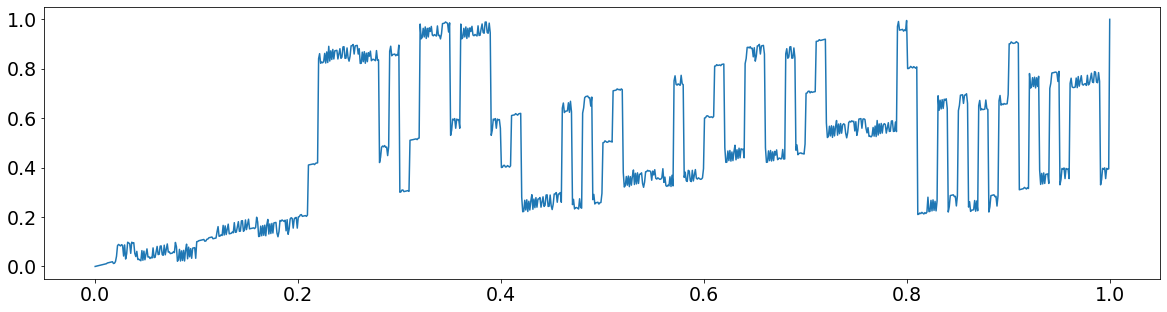

In [13]:
out_path ="img/0_1.png"
figsize=(20, 5)
fontsize_x=20.0
x_ticks_size=19
fontsize_y=20
y_ticks_size=19
linewidth=1

x = np.linspace(0,1.0,1000)
y = c_f(x)
fig, ax = plt.subplots(figsize=figsize)
plt.plot(x,y);
ax.tick_params(axis="x", labelsize=x_ticks_size);
ax.tick_params(axis="y", labelsize=y_ticks_size, rotation=0);
fig.savefig(out_path, bbox_inches="tight")

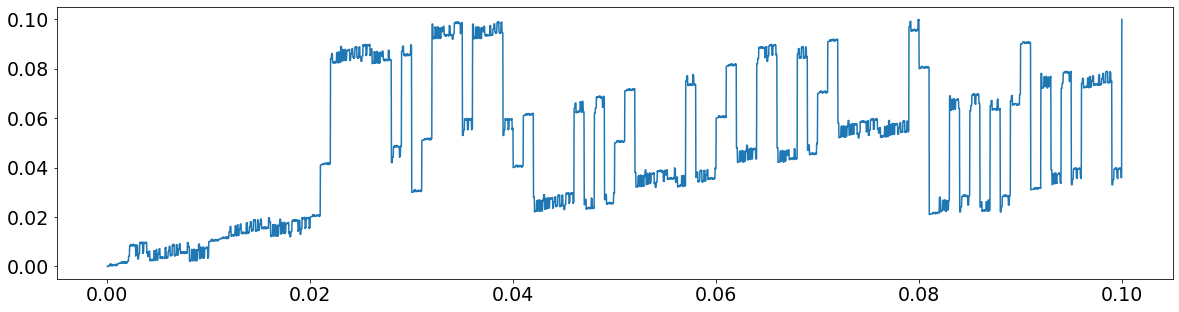

In [14]:
out_path ="img/0_0p1.png"
figsize=(20, 5)
fontsize_x=20.0
x_ticks_size=19
fontsize_y=20
y_ticks_size=19
linewidth=1

x = np.linspace(0,0.1,4000)
y = c_f(x)
fig, ax = plt.subplots(figsize=figsize)
plt.plot(x,y);
ax.tick_params(axis="x", labelsize=x_ticks_size);
ax.tick_params(axis="y", labelsize=y_ticks_size, rotation=0);
fig.savefig(out_path, bbox_inches="tight")

## Primes, Rationals and Irrationals

In [15]:
from functools import reduce

primes = [2,3,5,7,11,13,17,19,23,29,31,37,41,43,47,53,59,61,67,71,73,79,83,89,97,101,103,107,109,113,127,131,137,139,149,151,157,163,167,173,179,181,191,193,197,199,211,223,227,229,233,239,241,251,257,263,269,271,277,281,283,293,307,311,313,317,331,337,347,349,353,359,367,373,379,383,389,397,401,409,419,421,431,433,439,443,449,457,461,463,467,479,487,491,499,503,509,521,523,541,547,557,563,569,571,577,587,593,599,601,607,613,617,619,631,641,643,647,653,659,661,673,677,683,691,701,709,719,727,733,739,743,751,757,761,769,773,787,797,809,811,821,823,827,829,839,853,857,859,863,877,881,883,887,907,911,919,929,937,941,947,953,967,971,977,983,991,997,1009,1013,1019,1021,1031,1033,1039,1049,1051,1061,1063,1069,1087,1091,1093,1097,1103,1109,1117,1123,1129,1151,1153,1163,1171,1181,1187,1193,1201,1213,1217,1223,1229,1231,1237,1249,1259,1277,1279,1283,1289,1291,1297,1301,1303,1307,1319,1321,1327,1361,1367,1373,1381,1399,1409,1423,1427,1429,1433,1439,1447,1451,1453,1459,1471,1481,1483,1487,1489,1493,1499,1511,1523,1531,1543,1549,1553,1559,1567,1571,1579,1583,1597,1601,1607,1609,1613,1619,1621,1627,1637,1657,1663,1667,1669,1693,1697,1699,1709,1721,1723,1733,1741,1747,1753,1759,1777,1783,1787,1789,1801,1811,1823,1831,1847,1861,1867,1871,1873,1877,1879,1889,1901,1907,1913,1931,1933,1949,1951,1973,1979,1987,1993,1997,1999,2003,2011,2017,2027,2029,2039,2053,2063,2069,2081,2083,2087,2089,2099,2111,2113,2129,2131,2137,2141,2143,2153,2161,2179,2203,2207,2213,2221,2237,2239,2243,2251,2267,2269,2273,2281,2287,2293,2297,2309,2311,2333,2339,2341,2347,2351,2357,2371,2377,2381,2383,2389,2393,2399,2411,2417,2423,2437,2441,2447,2459,2467,2473,2477,2503,2521,2531,2539,2543,2549,2551,2557,2579,2591,2593,2609,2617,2621,2633,2647,2657,2659,2663,2671,2677,2683,2687,2689,2693,2699,2707,2711,2713,2719,2729,2731,2741,2749,2753,2767,2777,2789,2791,2797,2801,2803,2819,2833,2837,2843,2851,2857,2861,2879,2887,2897,2903,2909,2917,2927,2939,2953,2957,2963,2969,2971,2999,3001,3011,3019,3023,3037,3041,3049,3061,3067,3079,3083,3089,3109,3119,3121,3137,3163,3167,3169,3181,3187,3191,3203,3209,3217,3221,3229,3251,3253,3257,3259,3271,3299,3301,3307,3313,3319,3323,3329,3331,3343,3347,3359,3361,3371,3373,3389,3391,3407,3413,3433,3449,3457,3461,3463,3467,3469,3491,3499,3511,3517,3527,3529,3533,3539,3541,3547,3557,3559,3571,3581,3583,3593,3607,3613,3617,3623,3631,3637,3643,3659,3671,3673,3677,3691,3697,3701,3709,3719,3727,3733,3739,3761,3767,3769,3779,3793,3797,3803,3821,3823,3833,3847,3851,3853,3863,3877,3881,3889,3907,3911,3917,3919,3923,3929,3931,3943,3947,3967,3989,4001,4003,4007,4013,4019,4021,4027,4049,4051,4057,4073,4079,4091,4093,4099,4111,4127,4129,4133,4139,4153,4157,4159,4177,4201,4211,4217,4219,4229,4231,4241,4243,4253,4259,4261,4271,4273,4283,4289,4297,4327,4337,4339,4349,4357,4363,4373,4391,4397,4409,4421,4423,4441,4447,4451,4457,4463,4481,4483,4493,4507,4513,4517,4519,4523,4547,4549,4561,4567,4583,4591,4597,4603,4621,4637,4639,4643,4649,4651,4657,4663,4673,4679,4691,4703,4721,4723,4729,4733,4751,4759,4783,4787,4789,4793,4799,4801,4813,4817,4831,4861,4871,4877,4889,4903,4909,4919,4931,4933,4937,4943,4951,4957,4967,4969,4973,4987,4993,4999,5003,5009,5011,5021,5023,5039,5051,5059,5077,5081,5087,5099,5101,5107,5113,5119,5147,5153,5167,5171,5179,5189,5197,5209,5227,5231,5233,5237,5261,5273,5279,5281,5297,5303,5309,5323,5333,5347,5351,5381,5387,5393,5399,5407,5413,5417,5419,5431,5437,5441,5443,5449,5471,5477,5479,5483,5501,5503,5507,5519,5521,5527,5531,5557,5563,5569,5573,5581,5591,5623,5639,5641,5647,5651,5653,5657,5659,5669,5683,5689,5693,5701,5711,5717,5737,5741,5743,5749,5779,5783,5791,5801,5807,5813,5821,5827,5839,5843,5849,5851,5857,5861,5867,5869,5879,5881,5897,5903,5923,5927,5939,5953,5981,5987,6007,6011,6029,6037,6043,6047,6053,6067,6073,6079,6089,6091,6101,6113,6121,6131,6133,6143,6151,6163,6173,6197,6199,6203,6211,6217,6221,6229,6247,6257,6263,6269,6271,6277,6287,6299,6301,6311,6317,6323,6329,6337,6343,6353,6359,6361,6367,6373,6379,6389,6397,6421,6427,6449,6451,6469,6473,6481,6491,6521,6529,6547,6551,6553,6563,6569,6571,6577,6581,6599,6607,6619,6637,6653,6659,6661,6673,6679,6689,6691,6701,6703,6709,6719,6733,6737,6761,6763,6779,6781,6791,6793,6803,6823,6827,6829,6833,6841,6857,6863,6869,6871,6883,6899,6907,6911,6917,6947,6949,6959,6961,6967,6971,6977,6983,6991,6997,7001,7013,7019,7027,7039,7043,7057,7069,7079,7103,7109,7121,7127,7129,7151,7159,7177,7187,7193,7207,7211,7213,7219,7229,7237,7243,7247,7253,7283,7297,7307,7309,7321,7331,7333,7349,7351,7369,7393,7411,7417,7433,7451,7457,7459,7477,7481,7487,7489,7499,7507,7517,7523,7529,7537,7541,7547,7549,7559,7561,7573,7577,7583,7589,7591,7603,7607,7621,7639,7643,7649,7669,7673,7681,7687,7691,7699,7703,7717,7723,7727,7741,7753,7757,7759,7789,7793,7817,7823,7829,7841,7853,7867,7873,7877,7879,7883,7901,7907,7919,7927,7933,7937,7949,7951,7963,7993,8009,8011,8017,8039,8053,8059,8069,8081,8087,8089,8093,8101,8111,8117,8123,8147,8161,8167,8171,8179,8191,8209,8219,8221,8231,8233,8237,8243,8263,8269,8273,8287,8291,8293,8297,8311,8317,8329,8353,8363,8369,8377,8387,8389,8419,8423,8429,8431,8443,8447,8461,8467,8501,8513,8521,8527,8537,8539,8543,8563,8573,8581,8597,8599,8609,8623,8627,8629,8641,8647,8663,8669,8677,8681,8689,8693,8699,8707,8713,8719,8731,8737,8741,8747,8753,8761,8779,8783,8803,8807,8819,8821,8831,8837,8839,8849,8861,8863,8867,8887,8893,8923,8929,8933,8941,8951,8963,8969,8971,8999,9001,9007,9011,9013,9029,9041,9043,9049,9059,9067,9091,9103,9109,9127,9133,9137,9151,9157,9161,9173,9181,9187,9199,9203,9209,9221,9227,9239,9241,9257,9277,9281,9283,9293,9311,9319,9323,9337,9341,9343,9349,9371,9377,9391,9397,9403,9413,9419,9421,9431,9433,9437,9439,9461,9463,9467,9473,9479,9491,9497,9511,9521,9533,9539,9547,9551,9587,9601,9613,9619,9623,9629,9631,9643,9649,9661,9677,9679,9689,9697,9719,9721,9733,9739,9743,9749,9767,9769,9781,9787,9791,9803,9811,9817,9829,9833,9839,9851,9857,9859,9871,9883,9887,9901,9907,9923,9929,9931,9941,9949,9967,9973,10007,10009,10037,10039,10061,10067,10069,10079,10091,10093,10099,10103,10111,10133,10139,10141,10151,10159,10163,10169,10177,10181,10193,10211,10223,10243,10247,10253,10259,10267,10271,10273,10289,10301,10303,10313,10321,10331,10333,10337,10343,10357,10369,10391,10399,10427,10429,10433,10453,10457,10459,10463,10477,10487,10499,10501,10513,10529,10531,10559,10567,10589,10597,10601,10607,10613,10627,10631,10639,10651,10657,10663,10667,10687,10691,10709,10711,10723,10729,10733,10739,10753,10771,10781,10789,10799,10831,10837,10847,10853,10859,10861,10867,10883,10889,10891,10903,10909,10937,10939,10949,10957,10973,10979,10987,10993,11003,11027,11047,11057,11059,11069,11071,11083,11087,11093,11113,11117,11119,11131,11149,11159,11161,11171,11173,11177,11197,11213,11239,11243,11251,11257,11261,11273,11279,11287,11299,11311,11317,11321,11329,11351,11353,11369,11383,11393,11399,11411,11423,11437,11443,11447,11467,11471,11483,11489,11491,11497,11503,11519,11527,11549,11551,11579,11587,11593,11597,11617,11621,11633,11657,11677,11681,11689,11699,11701,11717,11719,11731,11743,11777,11779,11783,11789,11801,11807,11813,11821,11827,11831,11833,11839,11863,11867,11887,11897,11903,11909,11923,11927,11933,11939,11941,11953,11959,11969,11971,11981,11987,12007,12011,12037,12041,12043,12049,12071,12073,12097,12101,12107,12109,12113,12119,12143,12149,12157,12161,12163,12197,12203,12211,12227,12239,12241,12251,12253,12263,12269,12277,12281,12289,12301,12323,12329,12343,12347,12373,12377,12379,12391,12401,12409,12413,12421,12433,12437,12451,12457,12473,12479,12487,12491,12497,12503,12511,12517,12527,12539,12541,12547,12553,12569,12577,12583,12589,12601,12611,12613,12619,12637,12641,12647,12653,12659,12671,12689,12697,12703,12713,12721,12739,12743,12757,12763,12781,12791,12799,12809,12821,12823,12829,12841,12853,12889,12893,12899,12907,12911,12917,12919,12923,12941,12953,12959,12967,12973,12979,12983,13001,13003,13007,13009,13033,13037,13043,13049,13063,13093,13099,13103,13109,13121,13127,13147,13151,13159,13163,13171,13177,13183,13187,13217,13219,13229,13241,13249,13259,13267,13291,13297,13309,13313,13327,13331,13337,13339,13367,13381,13397,13399,13411,13417,13421,13441,13451,13457,13463,13469,13477,13487,13499,13513,13523,13537,13553,13567,13577,13591,13597,13613,13619,13627,13633,13649,13669,13679,13681,13687,13691,13693,13697,13709,13711,13721,13723,13729,13751,13757,13759,13763,13781,13789,13799,13807,13829,13831,13841,13859,13873,13877,13879,13883,13901,13903,13907,13913,13921,13931,13933,13963,13967,13997,13999,14009,14011,14029,14033,14051,14057,14071,14081,14083,14087,14107,14143,14149,14153,14159,14173,14177,14197,14207,14221,14243,14249,14251,14281,14293,14303,14321,14323,14327,14341,14347,14369,14387,14389,14401,14407,14411,14419,14423,14431,14437,14447,14449,14461,14479,14489,14503,14519,14533,14537,14543,14549,14551,14557,14561,14563,14591,14593,14621,14627,14629,14633,14639,14653,14657,14669,14683,14699,14713,14717,14723,14731,14737,14741,14747,14753,14759,14767,14771,14779,14783,14797,14813,14821,14827,14831,14843,14851,14867,14869,14879,14887,14891,14897,14923,14929,14939,14947,14951,14957,14969,14983,15013,15017,15031,15053,15061,15073,15077,15083,15091,15101,15107,15121,15131,15137,15139,15149,15161,15173,15187,15193,15199,15217,15227,15233,15241,15259,15263,15269,15271,15277,15287,15289,15299,15307,15313,15319,15329,15331,15349,15359,15361,15373,15377,15383,15391,15401,15413,15427,15439,15443,15451,15461,15467,15473,15493,15497,15511,15527,15541,15551,15559,15569,15581,15583,15601,15607,15619,15629,15641,15643,15647,15649,15661,15667,15671,15679,15683,15727,15731,15733,15737,15739,15749,15761,15767,15773,15787,15791,15797,15803,15809,15817,15823,15859,15877,15881,15887,15889,15901,15907,15913,15919,15923,15937,15959,15971,15973,15991,16001,16007,16033,16057,16061,16063,16067,16069,16073,16087,16091,16097,16103,16111,16127,16139,16141,16183,16187,16189,16193,16217,16223,16229,16231,16249,16253,16267,16273,16301,16319,16333,16339,16349,16361,16363,16369,16381,16411,16417,16421,16427,16433,16447,16451,16453,16477,16481,16487,16493,16519,16529,16547,16553,16561,16567,16573,16603,16607,16619,16631,16633,16649,16651,16657,16661,16673,16691,16693,16699,16703,16729,16741,16747,16759,16763,16787,16811,16823,16829,16831,16843,16871,16879,16883,16889,16901,16903,16921,16927,16931,16937,16943,16963,16979,16981,16987,16993,17011,17021,17027,17029,17033,17041,17047,17053,17077,17093,17099,17107,17117,17123,17137,17159,17167,17183,17189,17191,17203,17207,17209,17231,17239,17257,17291,17293,17299,17317,17321,17327,17333,17341,17351,17359,17377]

prime_gap = []
for i,_ in enumerate(primes[:-1]):
    prime_gap.append(primes[i+1] - primes[i])

def get_decimals(float_):
    float_str = "{:.20f}".format(float_)
    float_str_after = float_str.split(".")[1]
    v = [int(x) for x in float_str_after]
    return v


prime_gap_str = reduce(lambda x,y: x+y, [str(i) for i in prime_gap])
prime_gap_v = [int(x) for x in prime_gap_str]
bound = len(prime_gap_v)
half = np.sqrt(bound)
n = np.min([int(np.floor(half)),50])


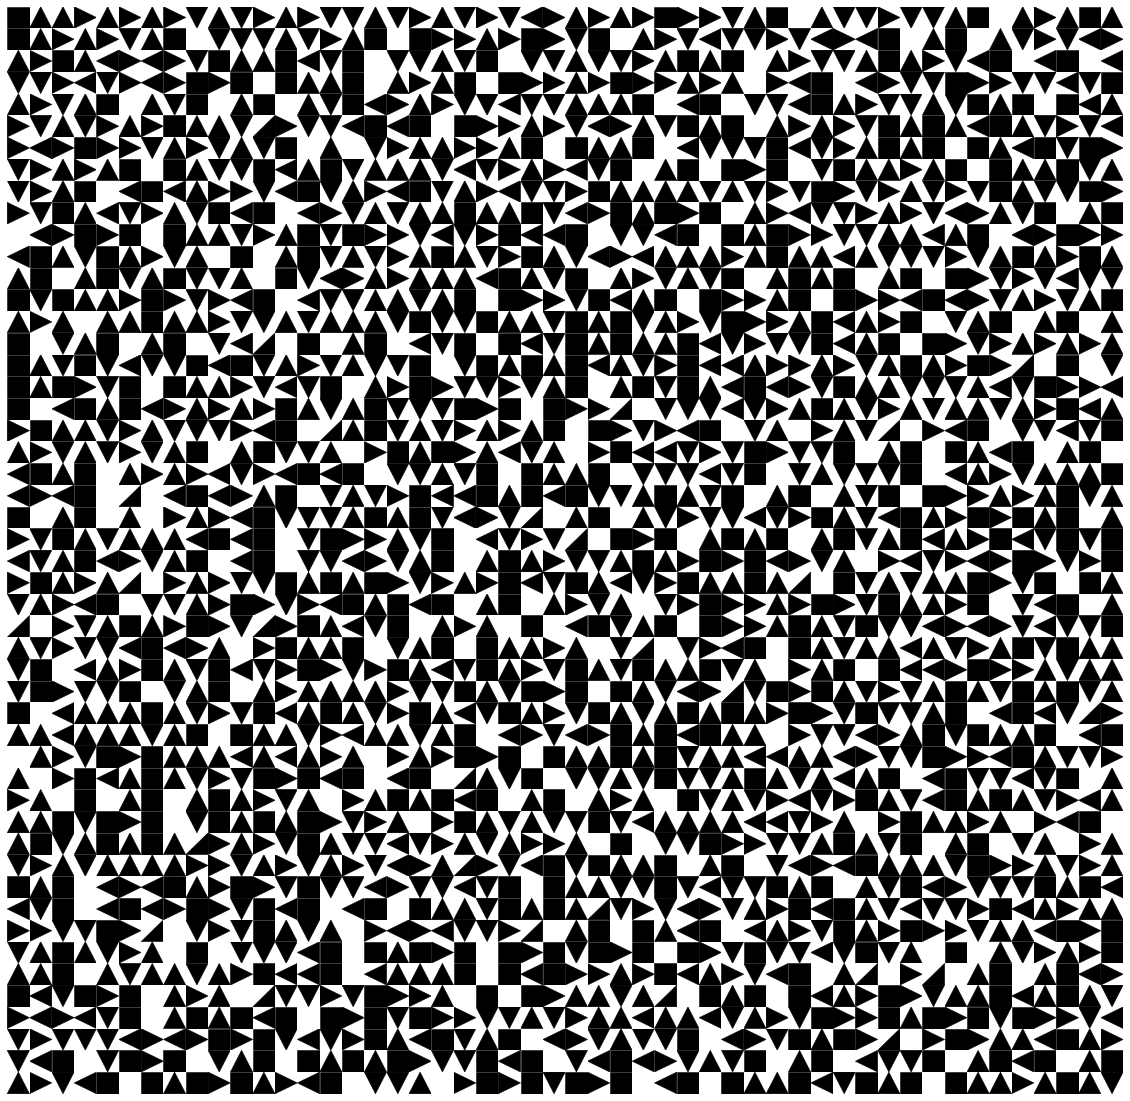

In [16]:
plt.style.use('ggplot')
alpha = 0.4

fig, _ = plt.subplots(n,n, figsize=(n*alpha,n*alpha))
fig.subplots_adjust(hspace=0.00, wspace=0.00)
for n,ax in zip(prime_gap_v, fig.axes):
    ax.add_patch(num2tile(n))
    ax.set_xticks([])
    ax.set_yticks([])
    ax.axis("off")
    ax.set_facecolor('white')
out_path ="img/mural_prime_gap.png"
fig.savefig(out_path, bbox_inches="tight", facecolor=fig.get_facecolor(), transparent=False)

### Rationals

In [17]:
all_vs = []
s = 20
obs = []
for _ in range(s):
# for a in primes[:s+1]:
    a = np.random.choice(primes)
    b = primes[primes.index(a)+1]
    float_ = a/b
    v = get_decimals(float_)
    all_vs.append((a,v))
    obs.append((float_,a,b))
    
    
all_vs.sort()
rationals = np.stack([v[1] for v in all_vs])
rationals_df = pd.DataFrame(obs,columns=["fraction", "a", "b"]).sort_values("a").reset_index(drop=True)
rationals_df

,fraction,a,b
0,0.994657,1117,1123
1,0.998839,1721,1723
2,0.997777,2693,2699
3,0.999385,3251,3253
4,0.999394,3299,3301
5,0.999601,5009,5011
6,0.996556,5209,5227
7,0.999051,6317,6323
8,0.998515,8069,8081
9,0.999272,8237,8243


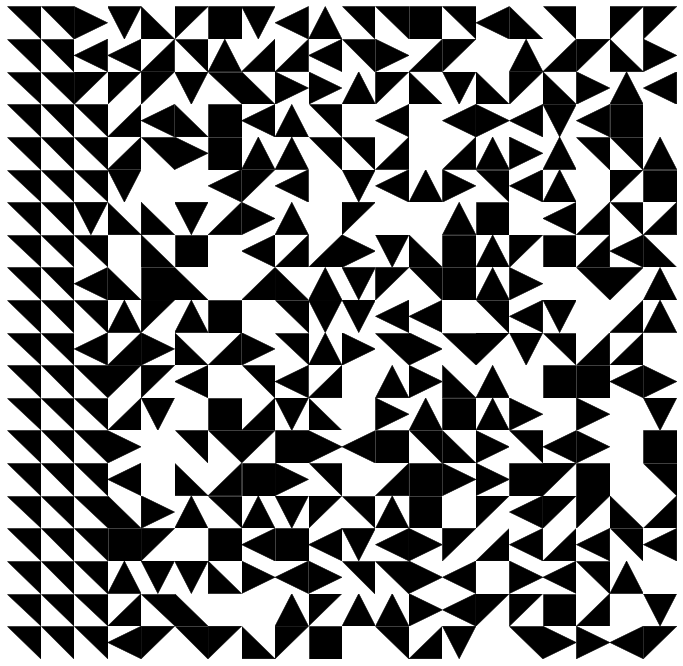

In [18]:
alpha = 0.6
fig, _ = plt.subplots(rationals.shape[0],rationals.shape[1], figsize=(rationals.shape[1]*alpha,rationals.shape[0]*alpha))
fig.subplots_adjust(hspace=0.00, wspace=0.00)
for n,ax in zip(rationals.flatten(), fig.axes):
    ax.add_patch(num2tile(n))
    ax.axis("off")
out_path ="img/mural_primes.png"
fig.savefig(out_path, bbox_inches="tight", facecolor=fig.get_facecolor(), transparent=False)

### Irrationals

In [19]:
all_vs = []
s = 10
obs = []
for a in rationals_df["a"]:
    float_ = np.sqrt(a)
    v = get_decimals(float_)
    all_vs.append((float_,v))
    obs.append((float_,a))
    
    
all_vs.sort()
irationals = np.stack([v[1] for v in all_vs])
irationals_df = pd.DataFrame(obs,columns=["value", "a"]).sort_values("value").reset_index(drop=True)
irationals_df

,value,a
0,33.421550,1117
1,41.484937,1721
2,51.894123,2693
3,57.017541,3251
4,57.436922,3299
5,70.774289,5009
6,72.173402,5209
7,79.479557,6317
8,89.827613,8069
9,90.757920,8237


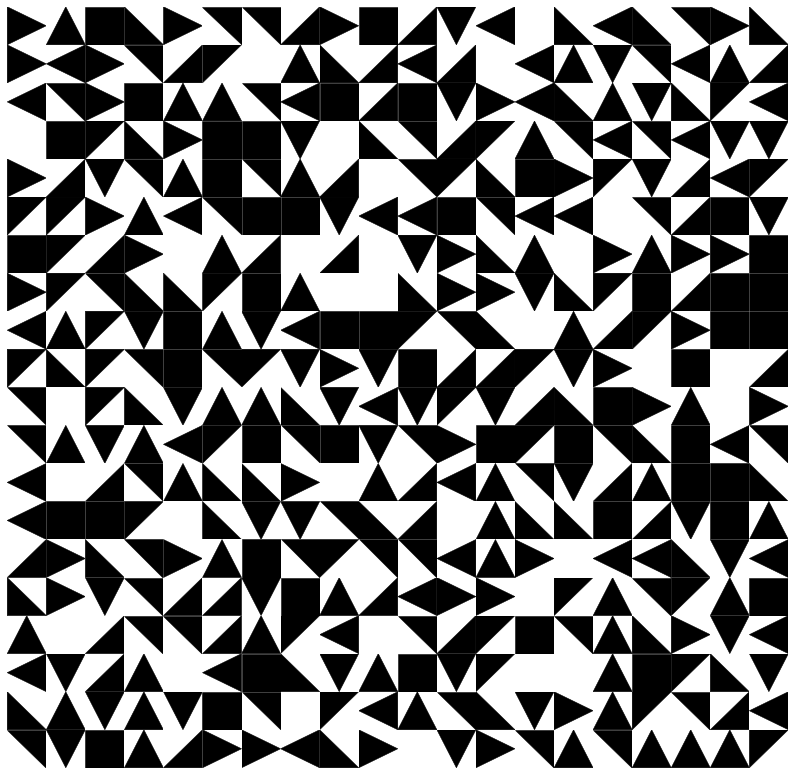

In [20]:
alpha = 0.7
fig, _ = plt.subplots(rationals.shape[0],rationals.shape[1], figsize=(rationals.shape[1]*alpha,rationals.shape[0]*alpha))
fig.subplots_adjust(hspace=0.00, wspace=0.00)
for n,ax in zip(irationals.flatten(), fig.axes):
    ax.add_patch(num2tile(n))
    ax.axis("off")
out_path ="img/mural_irrationals.png"
fig.savefig(out_path, bbox_inches="tight", facecolor=fig.get_facecolor(), transparent=False)

## Example of murals

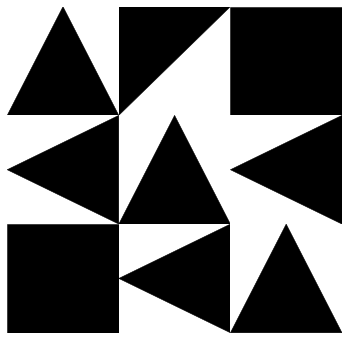

In [21]:
v = float2vector(math.e)
fig, _ = plt.subplots(3,3, figsize=(6,6))
fig.subplots_adjust(hspace=0.00, wspace=0.00)
for n,ax in zip(v, fig.axes):
    ax.add_patch(num2tile(n))
    ax.set_xticks([])
    ax.set_yticks([])
    ax.axis("off")
    ax.set_facecolor('white')

In [22]:
phi_10k = "6180339887498948482045868343656381177203091798057628621354486227052604628189024497072072041893911374847540880753868917521266338622235369317931800607667263544333890865959395829056383226613199282902678806752087668925017116962070322210432162695486262963136144381497587012203408058879544547492461856953648644492410443207713449470495658467885098743394422125448770664780915884607499887124007652170575179788341662562494075890697040002812104276217711177780531531714101170466659914669798731761356006708748071013179523689427521948435305678300228785699782977834784587822891109762500302696156170025046433824377648610283831268330372429267526311653392473167111211588186385133162038400522216579128667529465490681131715993432359734949850904094762132229810172610705961164562990981629055520852479035240602017279974717534277759277862561943208275051312181562855122248093947123414517022373580577278616008688382952304592647878017889921990270776903895321968198615143780314997411069260886742962267575605231727775203536139362107673893764556060605921658946675955190040055590895022953094231248235521221241544400647034056573479766397239494994658457887303962309037503399385621024236902513868041457799569812244574717803417312645322041639723213404444948730231541767689375210306873788034417009395440962795589867872320951242689355730970450959568440175551988192180206405290551893494759260073485228210108819464454422231889131929468962200230144377026992300780308526118075451928877050210968424936271359251876077788466583615023891349333312231053392321362431926372891067050339928226526355620902979864247275977256550861548754357482647181414512700060238901620777322449943530889990950168032811219432048196438767586331479857191139781539780747615077221175082694586393204565209896985556781410696837288405874610337810544439094368358358138113116899385557697548414914453415091295407005019477548616307542264172939468036731980586183391832859913039607201445595044977921207612478564591616083705949878600697018940988640076443617093341727091914336501371576601148038143062623805143211734815100559013456101180079050638142152709308588092875703450507808145458819906336129827981411745339273120809289727922213298064294687824274874017450554067787570832373109759151177629784432847479081765180977872684161176325038612112914368343767023503711163307258698832587103363222381098090121101989917684149175123313401527338438372345009347860497929459915822012581045982309255287212413704361491020547185549611808764265765110605458814756044317847985845397312863016254487611485202170644041116607669505977578325703951108782308271064789390211156910392768384538633332156582965977310343603232254574363720412440640888267375843395367959312322134373209957498894699565647360072959998391288103197426312517971414320123112795518947781726914158911779919564812558001845506563295285985910009086218029775637892599916499464281930222935523466747593269516542140210913630181947227078901220872873617073486499981562554728113734798716569527489008144384053274837813782466917444229634914708157007352545707089772675469343822619546861533120953357923801460927351021011919021836067509730895752895774681422954339438549315533963038072916917584610146099505506480367930414723657203986007355076090231731250161320484358364817704848181099160244252327167219018933459637860878752870173935930301335901123710239171265904702634940283076687674363865132710628032317406931733448234356453185058135310854973335075996677871244905836367541328908624063245639535721252426117027802865604323494283730172557440583727826799603173936401328762770124367983114464369476705312724924104716700138247831286565064934341803900410178053395058772458665575522939158239708417729833728231152569260929959422400005606266786743579239724540848176519734362652689448885527202747787473359835367277614075917120513269344837529916499809360246178442675727767900191919070380522046123248239132610432719168451230602362789354543246176997575368904176365025478513824631465833638337602357789926729886321618583959036399818384582764491245980937043055559613797343261348304949496868108953569634828178128862536460842033946538194419457142666823718394918323709085748502665680398974406621053603064002608171126659954199368731609457228881092077882277203636684481532561728411769097926666552238468831137185299192163190520156863122282071559987646842355205928537175780765605036773130975191223973887224682580571597445740484298780735221598426676625780770620194304005425501583125030175340941171910192989038447250332988024501436796844169479595453045910313811621870456799786636617460595700034459701135251813460065655352034788811741499412748264152135567763940390710387088182338068033500380468001748082205910968442026446402187705340100318028816644153091393948156403192822785482414510503188825189970074862287942155895742820216657062188090578088050324676991297287210387073697406435667458920258656573978560859566534107035997832044633634648548949766388535104552729824229069984885369682804645974576265143435905093832124374333387051665714900590710567024887985804371815126100440381488040725244061642902247822715272411208506578883871249363510680636516674322232776775579739927037623191470473239551206070550399208844260370879084333426183841359707816482955371432196118950379771463000755597537957035522714493191321725564401283091805045008992187051211860693357315389593507903007367270233141653204234015537414426871540551164796114332302485440409406911456139873026039518281680344825254326738575900560432024537271929124864581333441698529939135747869895798643949802304711696715736228391201812731291658995275991922031837235682727938563733126547998591246327503006059256745497943508811929505685493259355318729141801136412187470752628106869830135760524719445593219553596104528303148839117693011965858343144248948985655842508341094295027719758335224429125736493807541711373924376014350682987849327129975122868819604983577515877178041069713196675347719479226365190163397712847390793361111914089983056033610609871717830554354035608952929081846414371392943781356048203894791257450770755751030024207266290018090422934249425906066614133228722698069014599451199547801639915141261252572828066433126165746938819510644216738718000110042184830258091654338374923641183888564685143150063731904295148146942431460895254707203740556691306922099080481945297511065046428105417755259095187131888359147659960413179602094153085855332387725380232727632977372143127968216716234421183201802881412747443168847218459392781435474099999072233203059262976611238327983316988253931262006503702884478286669404473079471047612558658375298623625099982323359715507233838332440815257781933642626304330265895817080045127887311593558774721725649470005163667257715392098409503274511215368730091219962952276591316370939686072713426926231547533043799331658110736964314217197943405639155121081081362626888569748068060116918941750272298741586991791453499462444194012197858601373660828690722365147713912687420966513787562059185432888834174292090156313328319357562208971376563097850156315498245644586542479293572282875060848145335135218172958793299117100324762220521946451053624505129884308713444395072442673514628617991832336459836963763272257569159723954383052086647474238151107927349483695239647926899369832491799950278950006045966131346336302494995148080532901790297518251587504900743518798351183603272277260171740453557165885557829729106195819351710554825793070910057635869901929721799516873117556314448564810022001425454055429273458837116020994794572082378043687189448056368918258024449963187834202749101533579107273362532890693347412380222201162627711930854485029541913200400999865566651775664095365619789781838045103035651013158945890287186108690589394713680148457001836649564720329433437429894642741255143590584348409195487015236140317391390361644019845505104912116979200120199960506994966403035086369290394100701945053201623487276323273244943963048089055425137972331475185207091025063685981679530481810073942453170023880475983432345041425843140636127210960228242337822809027976596077710849391517488731687771352239009117117350918600654620099024975852779254278165970383495058010626155333691093784659771052975022317307412177834418941184596586102980187787427445638669661277245038458605264151030408982577775447411533207640758816775149755380471162966777100587664615954967769270549623939857092550702740699781408431249653630718665337180605874224259816530705257383454157705429216299811491750861131176577317209561565647869547448927132060806354577946241453106698374211379816896382353330447788316933972872891810366408326985698825443851667586228993069643468489751484087903964760420361020602171739447026348763365439319522907738361673898117812424836557810503416945156362604300366574310847665487778012857792364541852244723617137422925584159313561286637167032807217155339264632573067306391085410886808574283858828060230334140855039097353872613451196292641599521278931135443146015273090255382710432596622674390374556361228613907831943357059003814870089866131539819585744233044197085669672229314273074138488278897558886079973870447020316683485694199096548029824931981765792682985562972301068277723516274078380743187782731821191969528005160879157212882633796823127256287000150018292975772999357909491964076344286157571354442789838304045470271019458004258202120234458063034503365814721854920367998997293535391968121331951653797453991114942444518303385884129040181781882137600665928494136775431745160540938711036871521164040582193447120448277596054169486453987832626954801391501903899593130670318661670663719640256928671388714663118919268568269199527645799771827875946096161721886810945465157886912241060981419726861925547878992631535947292282508054251690681401078179602188533076230556381631640192245450325765673925997651753080142716071430871886285983603746505713420467008343275423027704779331118366690323288530687387990713590074030490745988951364768760867844323824821893061757031956380323081971936356727419643872625870615433072963703812751517040600505759488272385634515639052657710426459476040556950959840888903762079956638801786185591594411172509231327977113803"
v = [int(x) for x in "".join(phi_10k)]

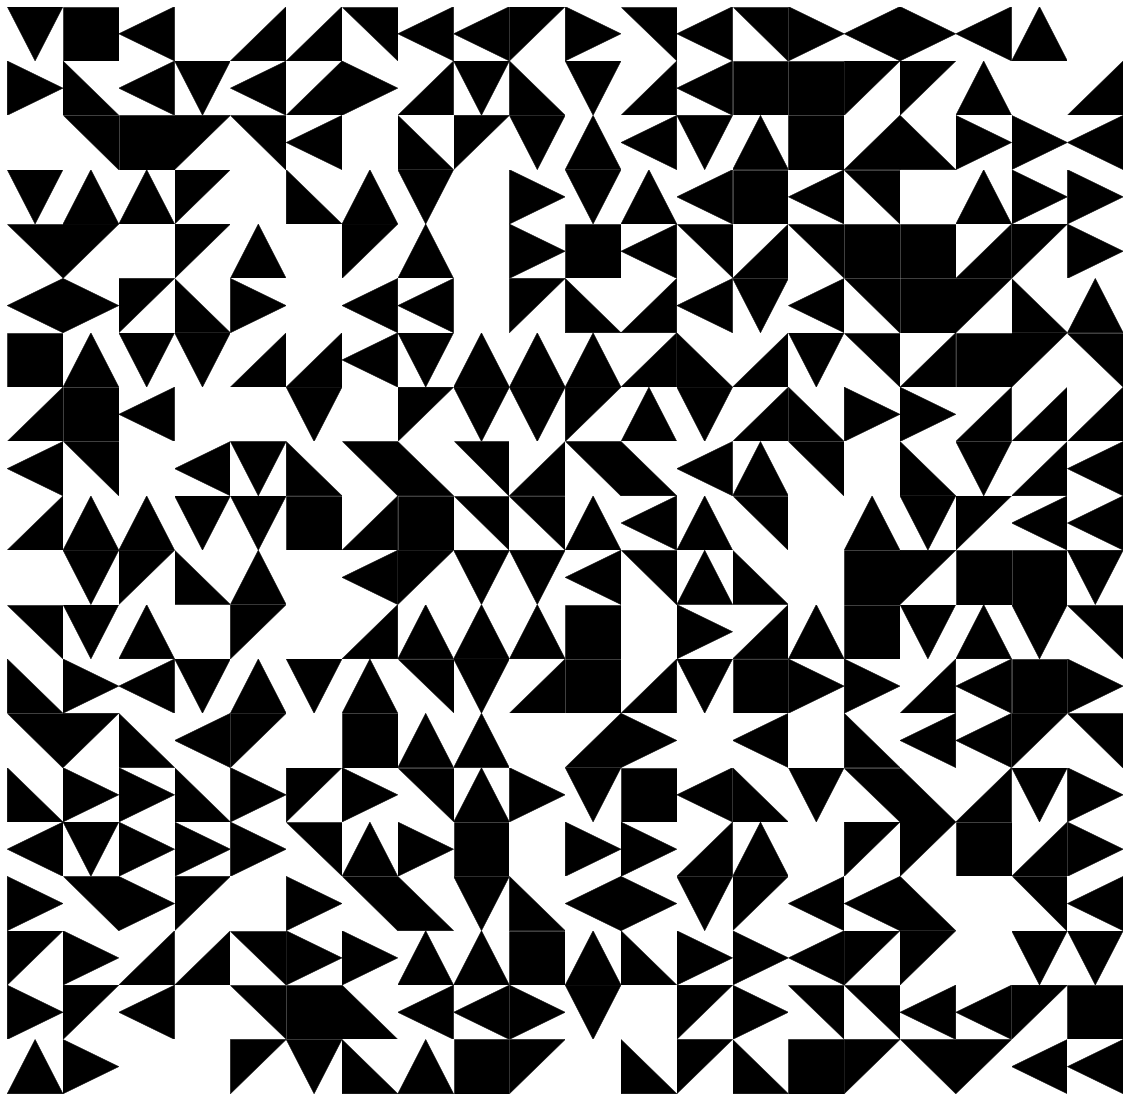

In [23]:
fig, _ = plt.subplots(20,20, figsize=(20,20))
fig.subplots_adjust(hspace=0.00, wspace=0.00)
for n,ax in zip(v, fig.axes):
    ax.add_patch(num2tile(n))
    ax.set_xticks([])
    ax.set_yticks([])
    ax.axis("off")
    ax.set_facecolor('white')
out_path ="img/mural1.png"
fig.savefig(out_path, bbox_inches="tight", facecolor=fig.get_facecolor(), transparent=False)

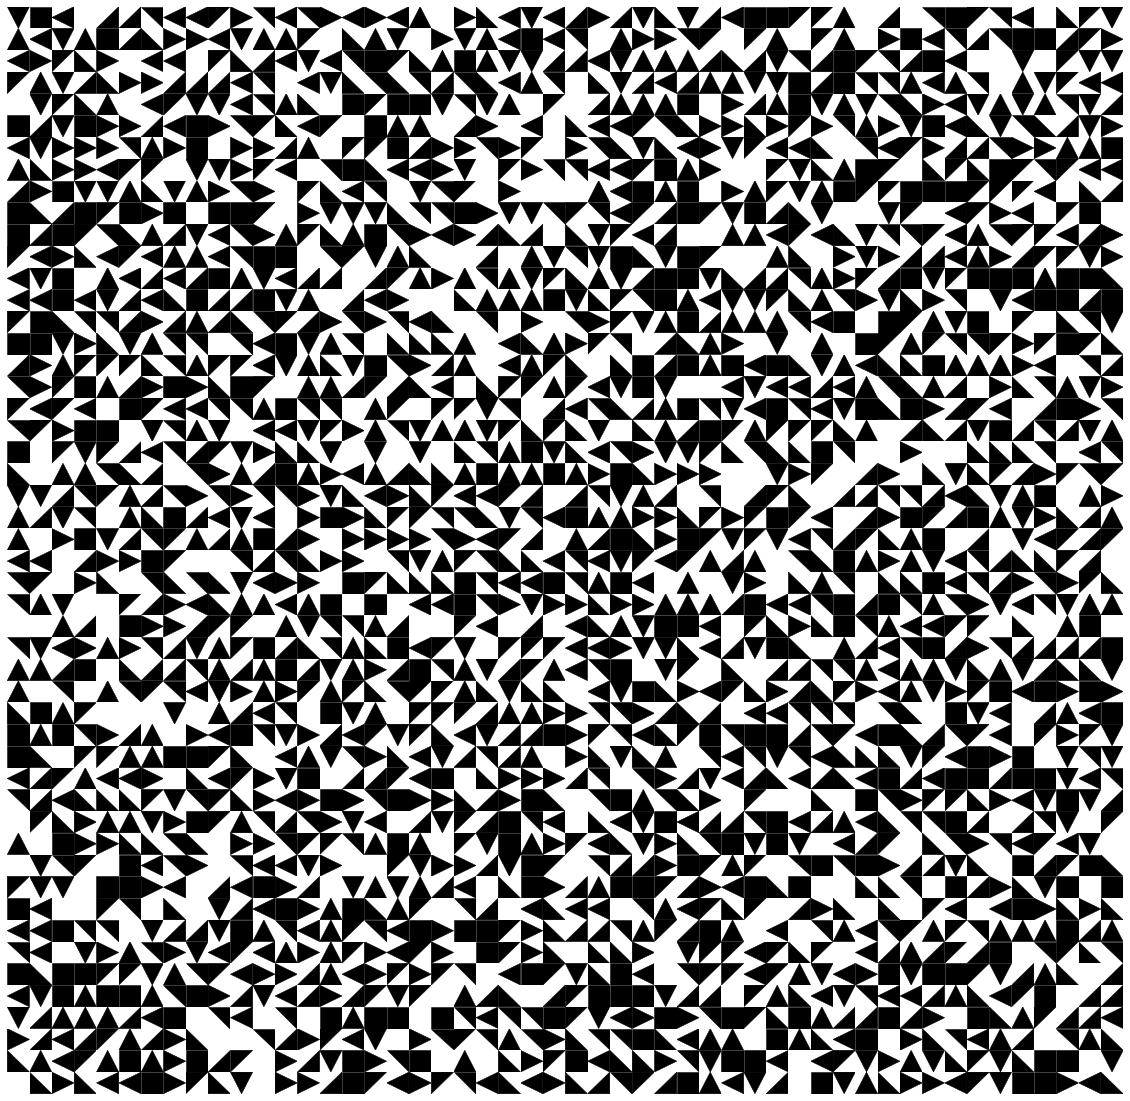

In [24]:
fig, _ = plt.subplots(50,50, figsize=(20,20))
fig.subplots_adjust(hspace=0.00, wspace=0.00)
for n,ax in zip(v, fig.axes):
    ax.add_patch(num2tile(n))
    ax.set_xticks([])
    ax.set_yticks([])
    ax.axis("off")
    ax.set_facecolor('white')
out_path ="img/mural2.png"
fig.savefig(out_path, bbox_inches="tight", facecolor=fig.get_facecolor(), transparent=False)

In [25]:
20/50

0.4